In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thapahemmagar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('kaggle_movie_train.csv')

In [4]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [5]:
df.shape

(22579, 3)

In [6]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


## Visualizing the count of 'genre' column from the dataset

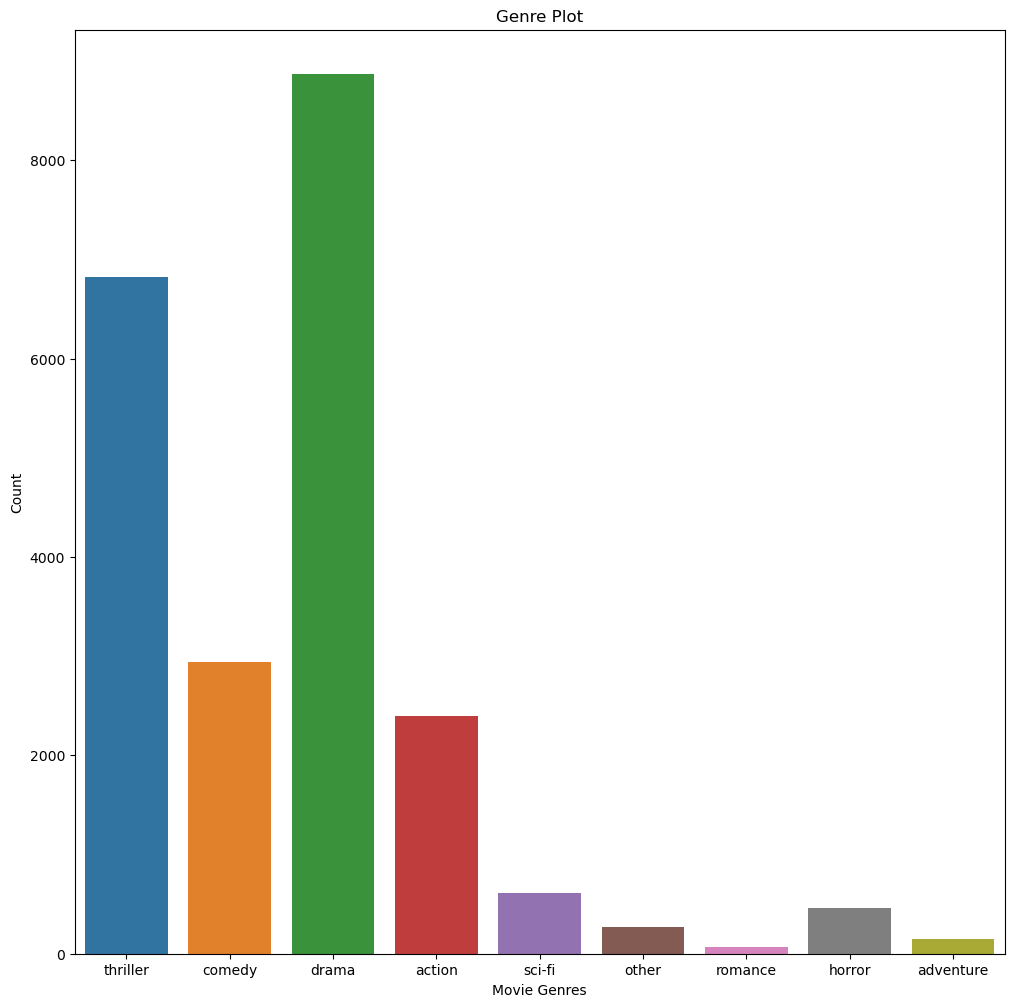

In [8]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# Data Cleaning and Preprocessing

In [10]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

## Mapping the genres to values

In [11]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 
                'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [12]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [13]:
df.drop('id', axis=1, inplace=True)

## Cleaning the text

In [21]:
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):
    dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i]) # Cleaning special character from the dialog/script
    dialog = dialog.lower() # Converting the entire dialog/script into lower case
    words = dialog.split() # Tokenizing the dialog/script by words
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))] # Removing the stop words
    words = [ps.stem(word) for word in dialog_words] # Stemming the words
    dialog = ' '.join(words) # Joining the stemmed words
    corpus.append(dialog) # Creating a corpus

In [17]:
corpus[0:2]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [18]:
len(corpus)

22579

In [23]:
drama_words = []
for i in list(df[df['genre']==4].index):
    drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
    action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
    comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
    drama += drama_words[i]
    action += action_words[i]
    comedy += comedy_words[i]

## Creating wordcloud for drama genre

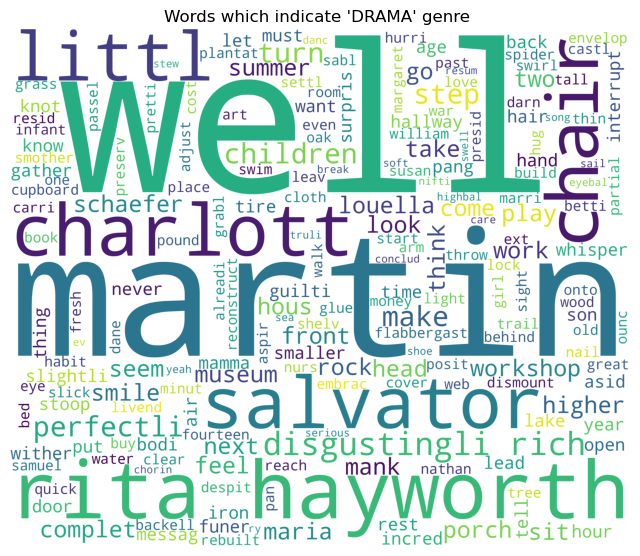

In [25]:
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

## Creating wordcloud for action genre

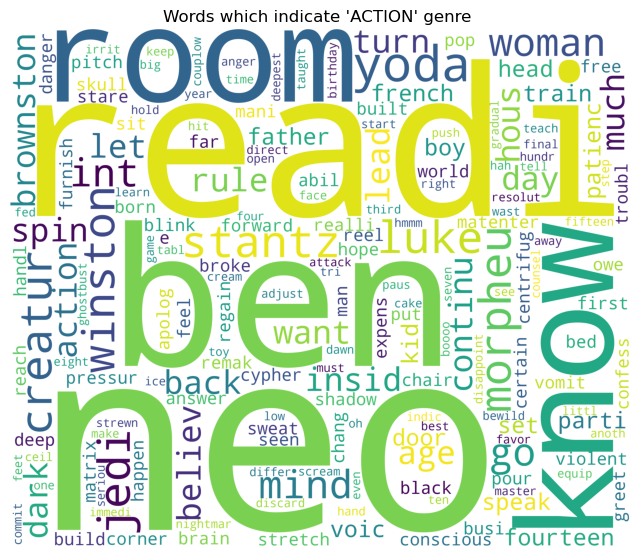

In [26]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

## Creating wordcloud for comedy genre

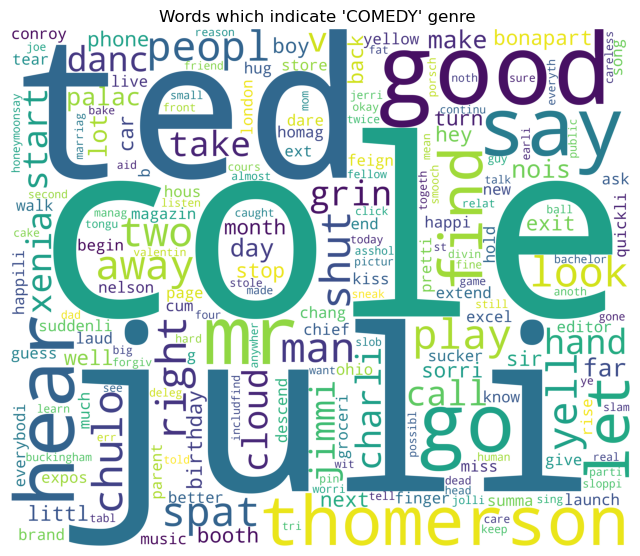

In [27]:
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

## Creating the Bag of Words model

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [31]:
y = df['genre'].values

## Model Building

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## Fitting Naive Bayes to the Training set

In [33]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

## Predicting the Test set results

In [34]:
nb_y_pred = nb_classifier.predict(X_test)

## Calculating Accuracy

In [35]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


# Predictions

In [36]:
def genre_prediction(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return nb_classifier.predict(temp)[0]

## Loading test dataset

In [37]:
test = pd.read_csv('kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [38]:
test.shape

(5589, 2)

In [39]:
test.drop('id', axis=1, inplace=True)

## Predicting values

In [40]:
from random import randint
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: asca green eyes. May fifth, 1683. I arrived in Donnelaith at dawn, eignteen years since my leaving... WIDE OF SCENE THE TALAMASCA GALLERY ARRON sits beside MICHAEL at the desk. He places a syringe next to the open manuscript. AARON In case it becomes too powerful. pause I'll be right beside you, Michael MICHAEL turns a page. Removes his gloves rubs his hands. ECU THE PAGE PETYR VAN ABLE'S VO Michael's bare hands come All that I feared is true INTO FRAM and hover... the lady in question is my His fingertips descend Suzanne. And she is to be and touch the page... burned at the stake as a witch... I was permitted to see her in her cell... A FEROCIOUS ROAR AND A FLASH OF BLINDING WHITE TURNS TO INT. A DUNGEON. MORNING 1683 AS IF MICHAEL WERE THERE PETYR VAN ABEL 35, scar1et hair, grey coat and large black hat stands in a hall as a HOODED FIGURE unlocks a door. PETYR steps in. The door shuts. He squints in the darkness. WOMAN'S VOICE You'll have no confession from me! Leave laughs o